In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

### Loading the dataset

In [22]:
df = pd.read_csv(os.path.join('data', 'cinemaTicket_Ref.csv'))
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


### Selecting the necessary columns and transforming, discarding the others

In [24]:
df.isna().sum()


film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [25]:
df[['date']] = df[['date']].apply(pd.to_datetime)
df = df.drop(columns= ['total_sales','tickets_out','month','quarter','day','ticket_use'])
df = df.dropna()
df[['tickets_sold','show_time']] = df[['tickets_sold','show_time']].astype(int)
df['day'] = df['date'].dt.day.astype(int)
df['month'] = df['date'].dt.month.astype(int)
df['year'] = df['date'].dt.year.astype(int)
df = df.drop(columns= ['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142399 entries, 0 to 142523
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142399 non-null  int64  
 1   cinema_code   142399 non-null  int64  
 2   tickets_sold  142399 non-null  int64  
 3   show_time     142399 non-null  int64  
 4   occu_perc     142399 non-null  float64
 5   ticket_price  142399 non-null  float64
 6   capacity      142399 non-null  float64
 7   day           142399 non-null  int64  
 8   month         142399 non-null  int64  
 9   year          142399 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 12.0 MB


### Checking for Duplicate Values, discarding

In [26]:
df.duplicated().value_counts()

False    142295
True        104
Name: count, dtype: int64

In [27]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142295 entries, 0 to 142523
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142295 non-null  int64  
 1   cinema_code   142295 non-null  int64  
 2   tickets_sold  142295 non-null  int64  
 3   show_time     142295 non-null  int64  
 4   occu_perc     142295 non-null  float64
 5   ticket_price  142295 non-null  float64
 6   capacity      142295 non-null  float64
 7   day           142295 non-null  int64  
 8   month         142295 non-null  int64  
 9   year          142295 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 11.9 MB


### Exploratory Data Analysis

##### Correlation Matrix

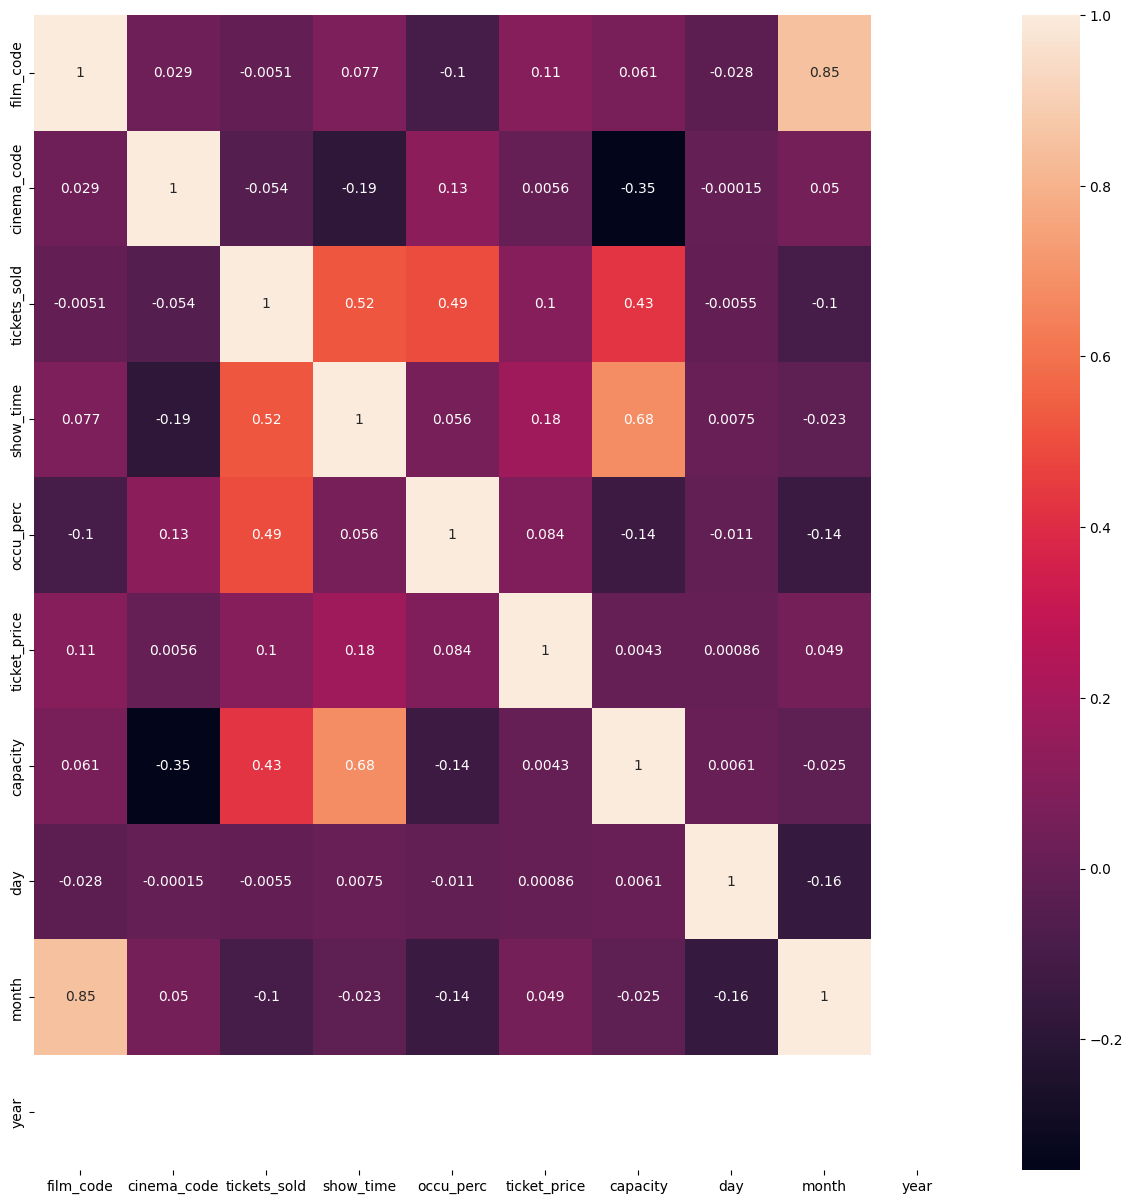

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### Monthly Sales of Tickets

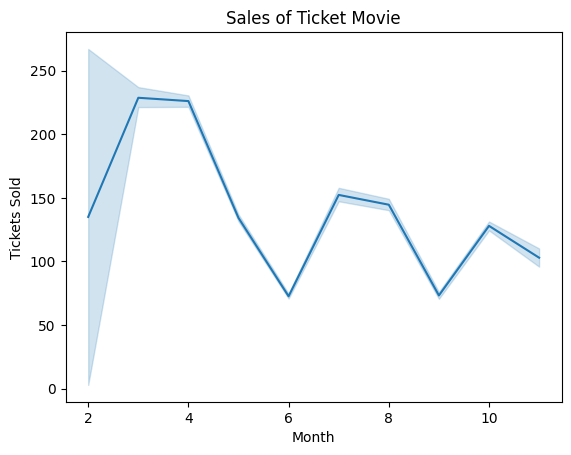

In [36]:
sns.lineplot(x=df['month'],y=df['tickets_sold'])

plt.title("Sales of Ticket Movie")
plt.xlabel("Month")
plt.ylabel("Tickets Sold")

plt.show()

##### Show Time engagement

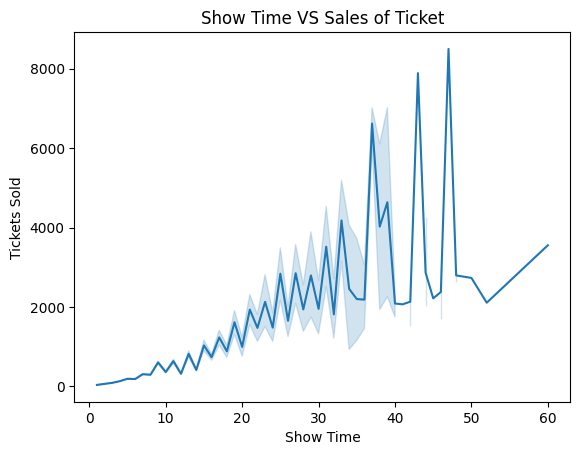

In [38]:
sns.lineplot(x=df['show_time'],y=df['tickets_sold'])

plt.title("Show Time VS Sales of Ticket")
plt.xlabel("Show Time")
plt.ylabel("Tickets Sold")

plt.show()